<a href="https://colab.research.google.com/github/MuraliKoushikDesu/MuraliKoushikDesu/blob/main/MuraliKoushikDesu_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
path_to_csv = '/content/gdrive/My Drive/glass.csv'

In [ ]:
# Load data
glass_df = pd.read_csv(path_to_csv)

In [ ]:
print(glass_df.shape)
glass_df.describe()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# Create arrays for the features and the response variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Scaling the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[19  7  2  0  0  0]
 [10 19  1  0  1  1]
 [ 2  3  0  0  0  0]
 [ 0  3  1  2  0  1]
 [ 0  0  0  0  3  1]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.59      0.68      0.63        28
           2       0.59      0.59      0.59        32
           3       0.00      0.00      0.00         5
           5       1.00      0.29      0.44         7
           6       0.75      0.75      0.75         4
           7       0.75      0.90      0.82        10

    accuracy                           0.60        86
   macro avg       0.61      0.53      0.54        86
weighted avg       0.62      0.60      0.59        86



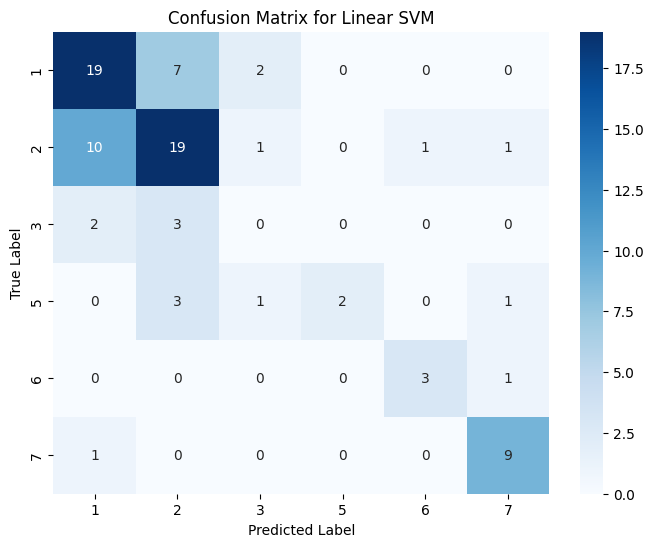

In [ ]:
from sklearn.svm import LinearSVC

# Initializing the model
linear_svc = LinearSVC(max_iter=10000, random_state=42)

# Training the model
linear_svc.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svc = linear_svc.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

# Predictions from Linear SVM
y_pred_svc = linear_svc.predict(X_test_scaled)

# Generate a confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Linear SVM')
plt.show()

              precision    recall  f1-score   support

           1       0.29      1.00      0.45        19
           2       1.00      0.00      0.00        23
           3       1.00      0.00      0.00         4
           5       1.00      0.00      0.00         6
           6       1.00      0.00      0.00         3
           7       1.00      0.00      0.00        10

    accuracy                           0.29        65
   macro avg       0.88      0.17      0.08        65
weighted avg       0.79      0.29      0.13        65



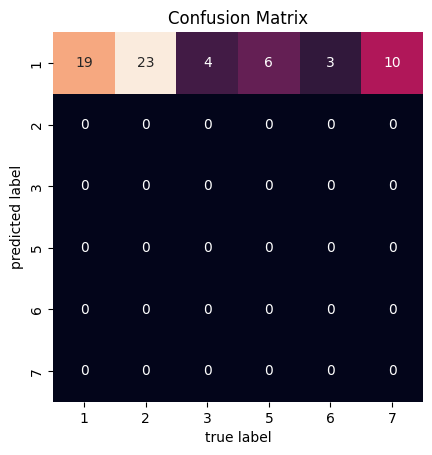

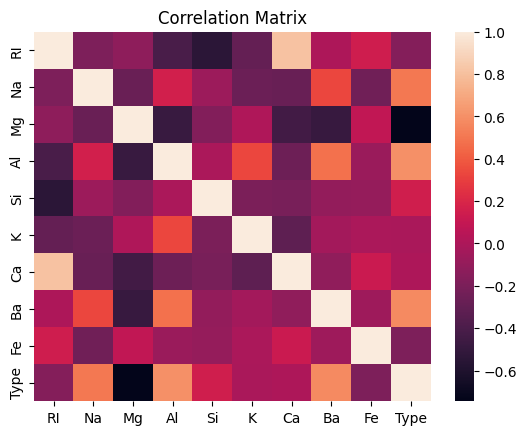

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/gdrive/My Drive/glass.csv')

# Split data into train and test sets
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000)
mlp.fit(X_train, y_train)

# Evaluate on test set
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()

# Correlation matrix
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Matrix')
plt.show()
